In [ ]:
# ==========================
# Instalar bibliotecas
# ==========================
!pip install openpyxl --quiet

# ==========================
# Importação de bibliotecas
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import files
from io import BytesIO

#Essa célula instala e importa as bibliotecas necessárias para análise de séries temporais e avaliação de previsões.


In [ ]:
# 📁 Carregar Dados - Foi ultilizado o dataset já ajustado em relação aos outliers
# =========================================
uploaded = files.upload()
df = pd.read_excel(next(iter(uploaded)))

Saving OrganizationType_Count_v4_semajust (1)_tratado_v2.xlsx to OrganizationType_Count_v4_semajust (1)_tratado_v2 (1).xlsx


In [ ]:
print(df)

             BSF  BSO  BSR  EDU  GOV  MED  NGO  UNKN  Total Geral
Date Breach                                                      
1990-01-01   0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0          1.0
1997-01-01   0.0  0.0  0.0  0.0  0.0  1.0  0.0   0.0          1.0
1999-09-22   0.0  0.0  0.0  0.0  0.0  1.0  0.0   0.0          1.0
2000-01-01   0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.0          1.0
2000-05-01   1.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0          1.0
...          ...  ...  ...  ...  ...  ...  ...   ...          ...
2025-01-22   0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0          1.0
2025-01-27   0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0          1.0
2025-01-28   0.0  0.0  0.0  0.0  0.0  0.0  0.0   1.0          1.0
2025-02-03   0.0  0.0  0.0  0.0  0.0  1.0  0.0   0.0          1.0
2025-02-04   0.0  0.0  0.0  0.0  1.0  0.0  0.0   0.0          1.0

[4715 rows x 9 columns]


In [ ]:
# ==========================
# Limpeza e preparação
# ==========================
# Remove linha 'UNKN' se existir
#df = df[df['Date Breach'] != 'UNKN'] #This line caused the error because 'Date Breach' is now the index
df = df[df.index != 'UNKN'] # Filter using the index instead of the column

# Converte a coluna de data
def ajustar_datas(data_str):
    try:
        if len(data_str) == 4:
            return pd.NaT
        elif len(data_str) == 7:
            return pd.Timestamp(data_str + '-01')     # Ano e mês
        else:
            return pd.Timestamp(data_str)             # Data completa
    except:
        return pd.NaT

#df['Date Breach'] = df['Date Breach'].apply(ajustar_datas) #'Date Breach' is now the index
#df = df.dropna(subset=['Date Breach'])  # Remove datas inválidas #'Date Breach' is now the index
# Define o índice como datas (essencial antes do resample)
#df.set_index('Date Breach', inplace=True) #'Date Breach' was already set as index in a previous cell


# Seleciona colunas por tipo de organização, exceto 'UNKN'
violation_cols = ['BSF', 'BSO', 'BSR', 'EDU', 'GOV', 'MED', 'NGO', 'UNKN', 'Total Geral']
df = df[violation_cols].fillna(0)

# Reamostragem mensal e filtro até 2024
df_monthly = df.resample('ME').sum()
#df_filtered = df_monthly[df_monthly.index <= '2024-12-31']
df_filtered = df_monthly[(df_monthly.index >= pd.to_datetime('2010-01-01')) & (df_monthly.index < pd.to_datetime('2024-01-01'))]

print(df_filtered)

# Essa célula converte as datas, filtra as colunas relevantes, remove nulos e prepara a série para modelagem.

count    168.000000
mean     200.788690
std      143.411947
min        5.000000
25%       69.000000
50%      202.750000
75%      327.125000
max      530.500000
Name: Total Geral, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/

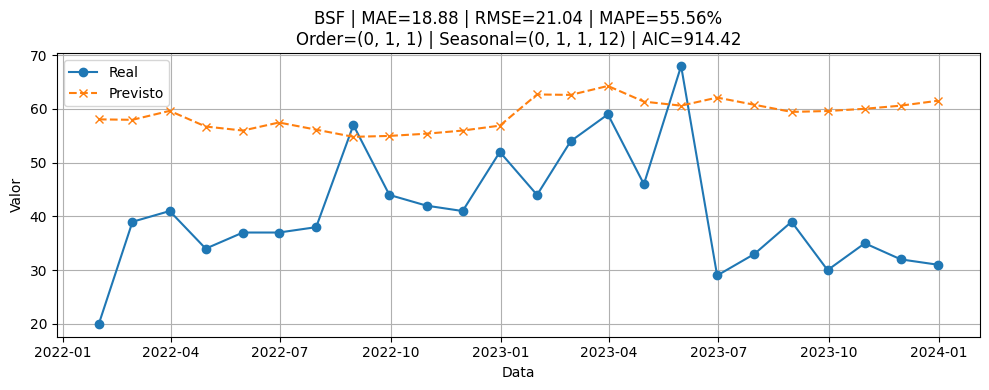

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels

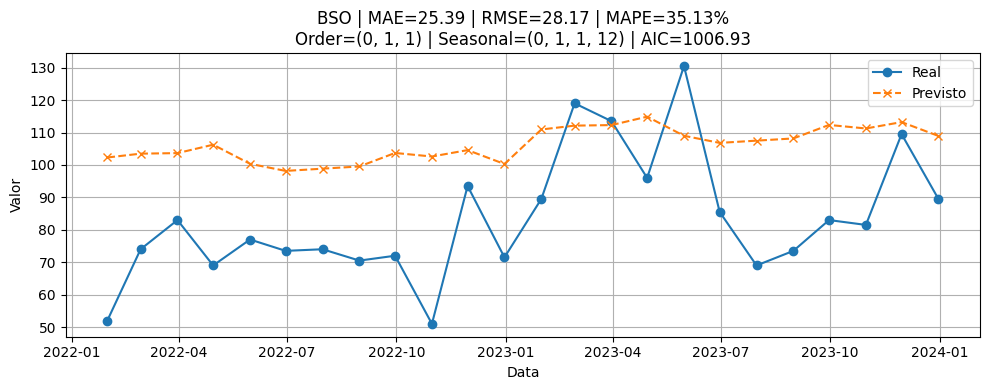

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/s

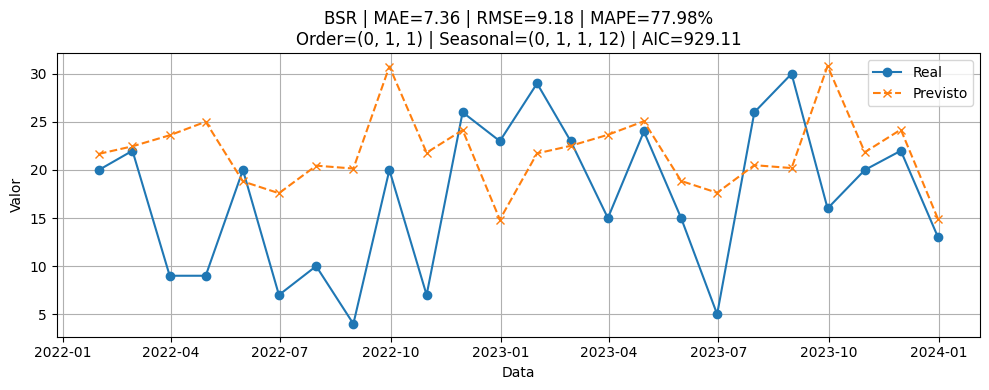

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespa

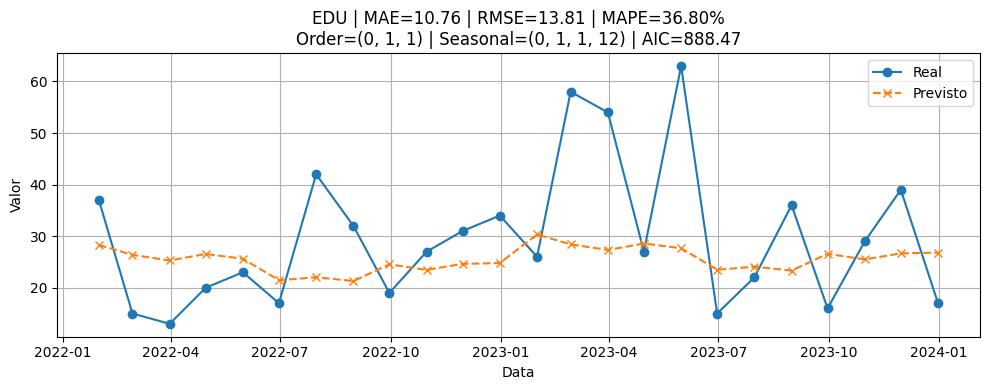

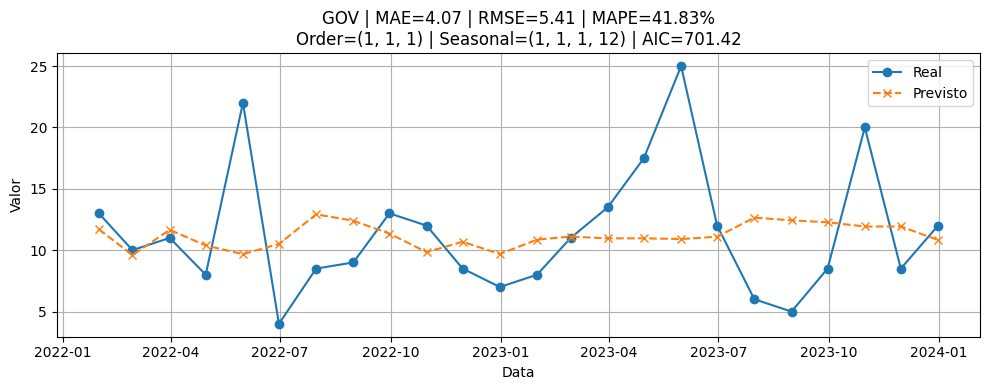

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/

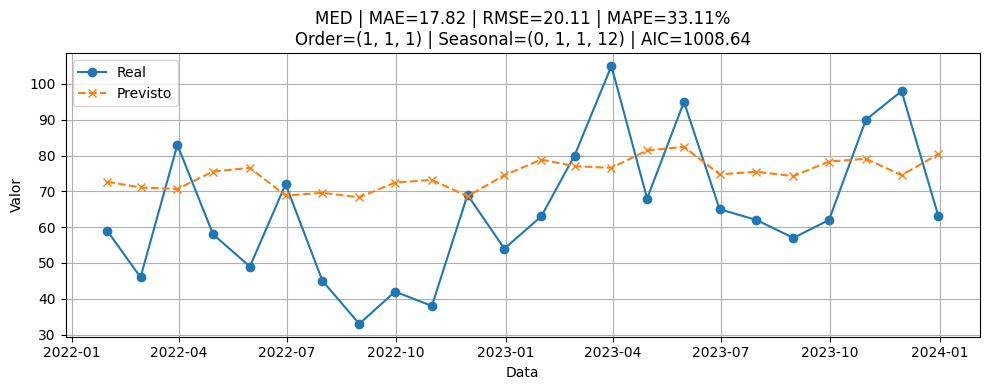

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodel

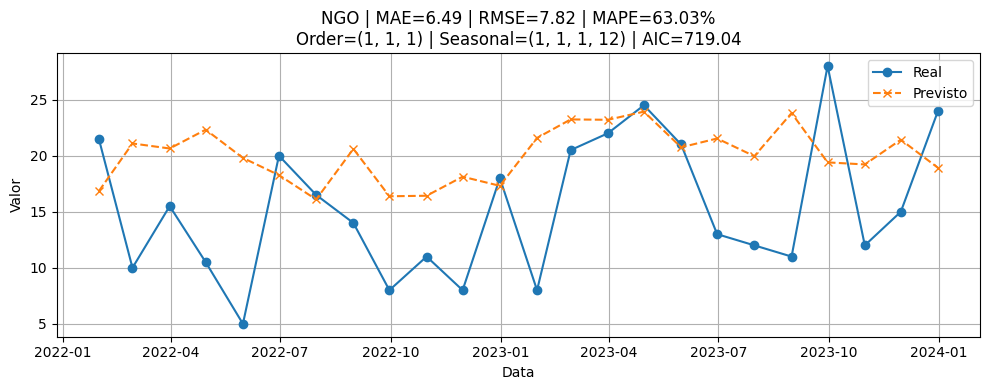

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/

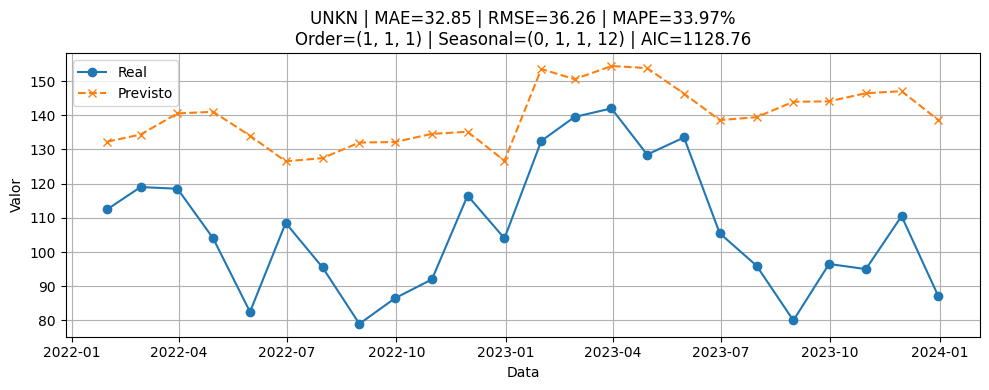

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.11/dist-packages/statsmodel

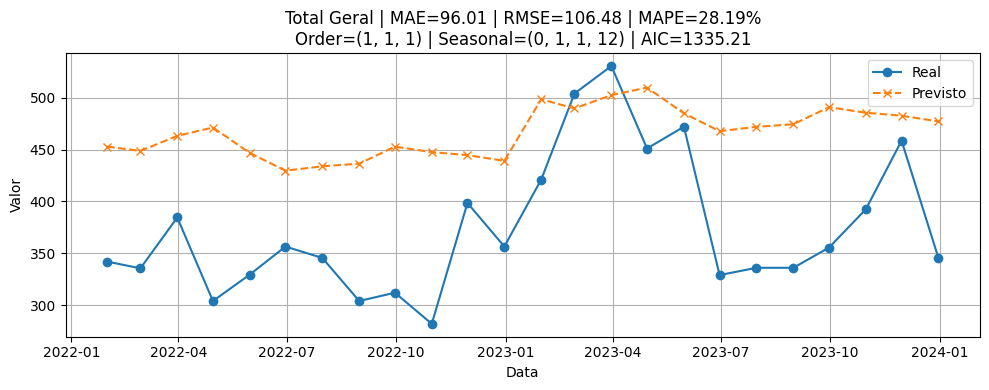

  Tipo de Organização      Order Seasonal_Order      AIC    MAE    RMSE  MAPE%
0                 BSF  (0, 1, 1)  (0, 1, 1, 12)   914.42  18.88   21.04  55.56
1                 BSO  (0, 1, 1)  (0, 1, 1, 12)  1006.93  25.39   28.17  35.13
2                 BSR  (0, 1, 1)  (0, 1, 1, 12)   929.11   7.36    9.18  77.98
3                 EDU  (0, 1, 1)  (0, 1, 1, 12)   888.47  10.76   13.81  36.80
4                 GOV  (1, 1, 1)  (1, 1, 1, 12)   701.42   4.07    5.41  41.83
5                 MED  (1, 1, 1)  (0, 1, 1, 12)  1008.64  17.82   20.11  33.11
6                 NGO  (1, 1, 1)  (1, 1, 1, 12)   719.04   6.49    7.82  63.03
7                UNKN  (1, 1, 1)  (0, 1, 1, 12)  1128.76  32.85   36.26  33.97
8         Total Geral  (1, 1, 1)  (0, 1, 1, 12)  1335.21  96.01  106.48  28.19


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools

# Define os parâmetros do Grid Search
p = d = q = range(0, 2)       # Parâmetros não sazonais
P = D = Q = range(0, 2)       # Parâmetros sazonais
s = 12                        # Sazonalidade mensal
param_combinations = list(itertools.product(p, d, q))
seasonal_combinations = list(itertools.product(P, D, Q))

results = []

for col in df_filtered.columns:
    serie = df_filtered[col].dropna()
    if serie.sum() == 0:
        continue

    train = serie[:-24]
    test = serie[-24:]

    best_aic = np.inf
    best_model = None
    best_params = None

    # Grid Search
    for param in param_combinations:
        for seasonal_param in seasonal_combinations:
            try:
                model = SARIMAX(train, order=param, seasonal_order=seasonal_param + (s,))
                fit = model.fit(disp=False)

                if fit.aic < best_aic:
                    best_aic = fit.aic
                    best_model = fit
                    best_params = (param, seasonal_param + (s,))
            except Exception as e:
                continue

    if best_model is None:
        print(f"⚠️ Nenhum modelo válido para {col}")
        continue

    # Forecast com o melhor modelo
    try:
        forecast = best_model.forecast(steps=24)
        forecast.index = test.index  # garantir alinhamento

        mae = mean_absolute_error(test, forecast)
        rmse = np.sqrt(mean_squared_error(test, forecast))
        mask = test != 0
        mape = np.mean(np.abs((test[mask] - forecast[mask]) / test[mask])) * 100 if mask.sum() > 0 else None

        results.append({
            'Tipo de Organização': col,
            'Order': best_params[0],
            'Seasonal_Order': best_params[1],
            'AIC': round(best_aic, 2),
            'MAE': round(mae, 2),
            'RMSE': round(rmse, 2),
            'MAPE%': round(mape, 2) if mape is not None else None
        })

        # Gráfico
        plt.figure(figsize=(10, 4))
        plt.plot(test, label='Real', marker='o')
        plt.plot(forecast, label='Previsto', marker='x', linestyle='--')
        plt.title(f'{col} | MAE={mae:.2f} | RMSE={rmse:.2f} | MAPE={mape:.2f}%\nOrder={best_params[0]} | Seasonal={best_params[1]} | AIC={best_aic:.2f}')
        plt.xlabel('Data')
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Erro ao prever {col}: {e}")
        continue

# Mostrar e salvar resultados
df_resultados = pd.DataFrame(results)
print(df_resultados)

df_resultados.to_csv('resultados_arima_gridsearch.csv', index=False)


## 📘 **Contextualização: O que é SARIMAX?**

O algoritmo **SARIMAX** (*Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors*) é uma extensão do **modelo ARIMA**, amplamente utilizado para modelagem de **séries temporais univariadas**.

🔹 **ARIMA** combina três componentes:
- **AR (AutoRegressive)**: relação entre uma observação e seus próprios valores defasados.
- **I (Integrated)**: diferenciação da série para torná-la estacionária.
- **MA (Moving Average)**: modelagem do erro como uma combinação linear de erros passados.

🔹 **SARIMAX** adiciona:
- **Sazonalidade (S)**: permite capturar padrões repetitivos em ciclos temporais (ex: mensal, anual).
- **Variáveis Exógenas (X)** *(opcional)*: possibilita a inclusão de variáveis auxiliares (não usadas neste exemplo).

✅ O SARIMAX é extremamente útil quando a série apresenta **sazonalidade** e precisa de um ajuste mais robusto do que o ARIMA tradicional.

---

## 💻 **Explicação do Código**

### 1. **Importação de bibliotecas**
```python
from statsmodels.tsa.statespace.sarimax import SARIMAX
```
Importa o modelo SARIMAX da biblioteca `statsmodels`, usada para análise estatística e séries temporais.

---

### 2. **Definição do Grid Search**
```python
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = 12
```
Define os parâmetros para a busca dos melhores hiperparâmetros do modelo:

- `p`, `d`, `q`: parâmetros do ARIMA (autorregressivo, diferenciação, média móvel).
- `P`, `D`, `Q`: equivalentes sazonais.
- `s = 12`: define a sazonalidade como **mensal**, considerando ciclos anuais.

Usa `itertools.product` para gerar todas as combinações possíveis entre os parâmetros.

---

### 3. **Loop por tipo de violação**
```python
for col in df_filtered.columns:
```
Cada coluna representa uma série temporal para um tipo de violação ou organização. O código processa **cada série de forma independente**.

---

### 4. **Separação em treino e teste**
```python
train = serie[:-24]
test = serie[-24:]
```
Divide os dados em:
- **Treino**: toda a série menos os últimos 24 pontos.
- **Teste**: os últimos 24 pontos — usados para avaliar o modelo.

---

### 5. **Grid Search para encontrar o melhor modelo**
```python
for param in param_combinations:
    for seasonal_param in seasonal_combinations:
```
Testa todas as combinações dos parâmetros definidos anteriormente. O modelo com o **menor AIC** (*Akaike Information Criterion*) é selecionado como o melhor.

O AIC é uma métrica de qualidade que penaliza modelos muito complexos, ajudando a evitar overfitting.

---

### 6. **Forecast com o melhor modelo**
```python
forecast = best_model.forecast(steps=24)
```
Gera previsões para o mesmo período do conjunto de teste. O `forecast` é alinhado ao índice da série real para facilitar a comparação.

---

### 7. **Avaliação do modelo**
```python
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = ...
```
Calcula as principais métricas de erro:
- **MAE**: erro médio absoluto (interpretação direta em unidades da variável).
- **RMSE**: penaliza mais fortemente grandes erros.
- **MAPE**: erro percentual — útil para comparar o desempenho entre séries diferentes.

---

### 8. **Visualização**
```python
plt.plot(test, label='Real')
plt.plot(forecast, label='Previsto')
```
Gera gráficos de linha para **comparar visualmente os valores reais e previstos**, ajudando a interpretar se o modelo conseguiu capturar a tendência e sazonalidade da série.

---

### 9. **Registro dos resultados**
```python
results.append({...})
```
Armazena os parâmetros e as métricas de desempenho de cada série em uma lista de dicionários.

---

### 10. **Criação e exportação do DataFrame**
```python
df_resultados = pd.DataFrame(results)
df_resultados.to_csv(...)
```
Cria um DataFrame com os resultados consolidados e salva em um arquivo `.csv`, facilitando futuras análises, visualizações ou uso no artigo.

---

## ✅ **Resumo Final**
 modelo **SARIMAX com ajuste automático de parâmetros via Grid Search**, buscando a melhor combinação de componentes sazonais e não sazonais para modelar e prever o comportamento de diferentes séries temporais. É ideal para aplicações que envolvem **dados mensais com padrões cíclicos**, como é comum em **indicadores de segurança pública, ambientais ou operacionais**.

Se quiser, posso complementar com gráficos de comparação entre ARIMA e XGBoost, ou incluir visualizações dos parâmetros ótimos encontrados. Deseja isso?